In [1]:
from typing import Tuple, List
from enum import Enum
import numpy as np
import torch
import math

import matplotlib.pyplot as plt
%matplotlib inline

import purplerl
from purplerl.train_robotarm import RobotArmEnvManager
from purplerl.config import GpuConfig

cfg = GpuConfig()
env = None

In [2]:
if env:
    env.close()
    env = None

import importlib
importlib.reload(purplerl.train_robotarm)

file_name = "/home/cthoens/code/UnityRL/ml-agents-robots/Builds/RobotArm.x86_64"
env = RobotArmEnvManager(file_name, port_=6164)

[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

/home/cthoens/code/UnityRL/ml-agents/ml-agents-envs/mlagents_envs/environment.py:94: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  unity_communicator_version = StrictVersion(unity_com_ver)
/home/cthoens/code/UnityRL/ml-agents/ml-agents-envs/mlagents_envs/rpc_utils.py:376: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.bool,


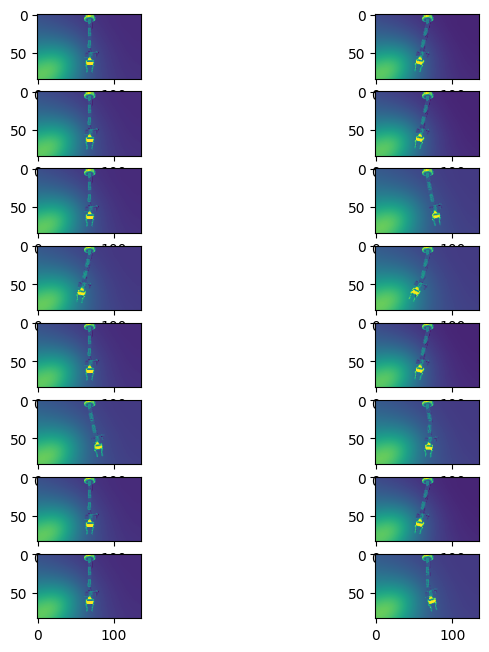

In [3]:
last_obs = env.reset()

fig, axs = plt.subplots(env.env_count, 2, figsize=(8,8), dpi= 100)
for envIdx in range(env.env_count):
    axs[envIdx,0].imshow(env._visual_obs(last_obs)[envIdx][0])
    axs[envIdx,1].imshow(env._visual_obs(last_obs)[envIdx][1])
plt.show()

[False, False, False, False, False, False, False, False]
[[ 0.54642683  0.08213128  0.06672984  0.0546604   0.54996926]
 [ 0.54642683  0.08213114  0.06672974  0.05466034  0.54996926]
 [ 0.54642683  0.0821313   0.06672987  0.0546604   0.54996926]
 [ 0.5508601   0.01378818  0.06585798  0.05441779  0.54996717]
 [ 0.54642683  0.08213134  0.06672985  0.0546604   0.54996926]
 [ 0.5478501   0.15026353  0.06748477  0.05486997  0.5499661 ]
 [ 0.54642683  0.08213128  0.06672987  0.05466037  0.54996926]
 [ 0.5251039  -0.01128316  0.04418628  0.03636355  0.5245835 ]]
[0. 0. 0. 0. 0. 0. 0. 0.]
[-0.0407484  -0.0407486  -0.04074817 -0.04056619 -0.04074863 -0.04091429
 -0.04074835 -0.02741114]


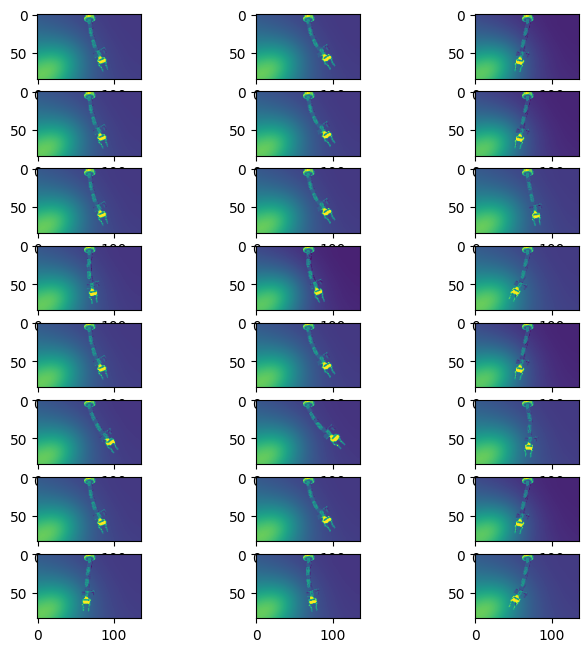

In [6]:
def heuristic(position_obs, env_index) -> list[int]:
    act = []
    
    for trainingAngle in position_obs[env_index]:
        act.append(3.0)
        
    return act

joint_angles = env._joint_angles(last_obs)

act = torch.tensor([heuristic(joint_angles, env_index) for env_index in range(env.env_count)])

obs, rew, done, success = env.step(act)

def plot():
    fig, axs = plt.subplots(env.env_count, 3, figsize=(8,8), dpi= 100)
    for envIdx in range(env.env_count):
        axs[envIdx,0].imshow(env._visual_obs(last_obs)[envIdx][0].squeeze())
        axs[envIdx,1].imshow(env._visual_obs(obs)[envIdx][0].squeeze())
        axs[envIdx,2].imshow(env._visual_obs(obs)[envIdx][1].squeeze())
    plt.show()
    

joint_angles = env._joint_angles(obs) #np.array(env._joint_angles(obs) * 180, dtype = int)
remaining = env._remaining(obs).flatten()
    
print(done)
print(joint_angles)
print(remaining)
#print(env.stats_channel.stats)
print(rew)

plot()

last_obs = obs

## 

In [7]:
env.close()
env=None

In [ ]:
def heuristic(position_obs, goal_obs, env_index) -> list[int]:
    act = []
    
    for trainingAngle, goalAngle in zip(position_obs[env_index], goal_obs[env_index]):
        trainingAngle *= 180
        goalAngle *= 180
        result = None
        if (trainingAngle < goalAngle - 3):
            act.append(3.0)
        elif (trainingAngle > goalAngle + 3):
            act.append(-3.0)
        else:
            act.append(0)
        
    return act

joint_angles = env._joint_angles(last_obs)
goal_angles = env._goal_angles(last_obs)

act = torch.tensor([heuristic(joint_angles, goal_angles, env_index) for env_index in range(env.env_count)])

In [8]:
env._visual_obs(last_obs)[envIdx][0].max()

1.0